## Getting started with `SumTree`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.size = 0
        self.curr_position = 0
    
    def add(self, priority, data):
        tree_index = self.curr_position + self.capacity - 1
        self.data[self.curr_position] = data
        self.update(tree_index, priority)
        
        self.curr_position += 1
        if self.curr_position >= self.capacity:
            self.curr_position = 0
            
        if self.size < self.capacity:
            self.size += 1
    
    def update(self, tree_index, priority):
        change = priority - self.tree[tree_index]
        self.tree[tree_index] = priority
        
        while tree_index != 0:
            tree_index = (tree_index - 1) // 2
            self.tree[tree_index] += change
    
    def get_leaf(self, v):
        parent_index = 0
        
        while True:
            left_child_index = 2 * parent_index + 1
            right_child_index = left_child_index + 1
            
            if left_child_index >= len(self.tree):
                leaf_index = parent_index
                break
                
            if v <= self.tree[left_child_index]:
                parent_index = left_child_index
            else:
                v -= self.tree[left_child_index]
                parent_index = right_child_index
        
        data_index = leaf_index - self.capacity + 1
        return leaf_index, self.tree[leaf_index], self.data[data_index]
    
    def total_priority(self):
        return self.tree[0]

In [2]:
sum_tree = SumTree(capacity=5)

experiences = [
    (10, "Experience 1: High priority"),
    (5, "Experience 2: Medium priority"),
    (2, "Experience 3: Low priority"),
    (8, "Experience 4: High-medium priority"),
    (3, "Experience 5: Low-medium priority")
]

In [3]:
for priority, data in experiences:
    print("Tree Array:", sum_tree.tree, "Total Priority: ", sum_tree.total_priority())
    sum_tree.add(priority, data)

Tree Array: [0. 0. 0. 0. 0. 0. 0. 0. 0.] Total Priority:  0.0
Tree Array: [10. 10.  0.  0. 10.  0.  0.  0.  0.] Total Priority:  10.0
Tree Array: [15. 10.  5.  0. 10.  5.  0.  0.  0.] Total Priority:  15.0
Tree Array: [17. 10.  7.  0. 10.  5.  2.  0.  0.] Total Priority:  17.0
Tree Array: [25. 18.  7.  8. 10.  5.  2.  8.  0.] Total Priority:  25.0


In [4]:
# Print the total priority
print(f"\nTotal Priority of the Tree: {sum_tree.total_priority()}")
print("Tree Array:", sum_tree.tree)


Total Priority of the Tree: 28.0
Tree Array: [28. 21.  7. 11. 10.  5.  2.  8.  3.]


## Sampling

In [5]:
for i in range(3):
    # Generate a random value between 0 and total priority
    sample_value = np.random.uniform(0, sum_tree.total_priority())
    
    # Get a leaf based on the random value
    leaf_index, priority, data = sum_tree.get_leaf(sample_value)
    
    print(f"Sample {i+1}:")
    print(f"  Random Value: {sample_value:.2f}")
    print(f"  Leaf Index: {leaf_index}")
    print(f"  Priority: {priority}")
    print(f"  Data: {data}")
    print("")

Sample 1:
  Random Value: 12.66
  Leaf Index: 4
  Priority: 10.0
  Data: Experience 1: High priority

Sample 2:
  Random Value: 14.17
  Leaf Index: 4
  Priority: 10.0
  Data: Experience 1: High priority

Sample 3:
  Random Value: 10.92
  Leaf Index: 8
  Priority: 3.0
  Data: Experience 5: Low-medium priority



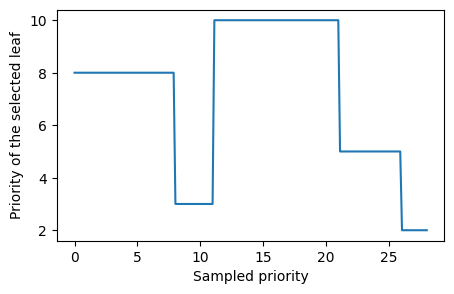

In [6]:
values = np.linspace(0, sum_tree.total_priority(),200)
leaf_indeces = np.zeros(values.size)
priorities = np.zeros(values.size)

for i in range(values.size):
    sample_value = values[i]
    leaf_index, priority, data = sum_tree.get_leaf(sample_value)
    leaf_indeces[i] = leaf_index
    priorities[i] = priority

plt.figure(figsize=(5, 3))
plt.plot(values, priorities)
plt.xlabel('Sampled priority')
plt.ylabel('Priority of the selected leaf')
plt.show()

## Priority update

In [7]:
# Find the index of an experience to update
update_index = sum_tree.capacity - 1  # Last added experience
new_priority = 15
sum_tree.update(update_index, new_priority)

print(f"Updated priority of an experience to {new_priority}")
print(f"New Total Priority: {sum_tree.total_priority()}")
print("Tree Array:", sum_tree.tree)

Updated priority of an experience to 15
New Total Priority: 33.0
Tree Array: [33. 26.  7. 11. 15.  5.  2.  8.  3.]
